In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
filename = ("Logisticdataset.csv")
df = pd.read_csv(filename,sep=r'\s*,\s*',
                 header=0, encoding='ascii', engine='python')
df=df.iloc[np.random.permutation(len(df))]
train=df.sample(frac=0.8) #random state is a seed value
test=df.drop(train.index)
train.head

<bound method NDFrame.head of         x1      x2    y
67  7.2014  6.8314  0.0
37  8.5172  5.1149  1.0
24  5.1518  3.5563  1.0
95  5.9868  7.3641  0.0
92  2.4443  5.8449  0.0
..     ...     ...  ...
22  4.8482  1.8793  1.0
91  1.7358  5.4503  0.0
76  0.9008  3.4379  0.0
27  7.2014  1.5438  1.0
61  5.9615  6.4565  0.0

[80 rows x 3 columns]>

In [2]:
x1 = train['x1'].values
x2 = train['x2'].values
Y= train['y'].values
x1_test = test['x1'].values
x2_test= test['x2'].values
Y_test= test['y'].values

In [3]:
m = len(x1)
n=len(x1_test)
x0 = np.ones(m)
x0_test=np.ones(n)
#we assume x0 to be 1 
X = np.array([x0, x1, x2]).T
X_test=np.array([x0_test, x1_test, x2_test]).T
#.T is used to obtain transpose 
# Initial Coefficients of B is assumed to be 0 
#our eqn will be in form of b0 + b1*x1 +b2*x2
B = np.zeros(3)
Y = np.array(Y)
alpha = 0.001
#alpha is learning rate

In [10]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))
def predict(B,X):
    Y=B.dot(X)
    if Y>= 0:
        return 1
    else:
        return 0

In [11]:
def grad_desc(X, Y, B, a, iteration):
    #is used to obtain a plot of how gradient descent works 
    m = len(Y)
    h=[0]*m
    
    for i in range(iteration):
        # value obtained from hypothesis
        z = X.dot(B)
        #print(z)
        # Difference between Hypothesis and Actual Y
        #note that los is calculate for all values so we divide it by m to obtain average loss
        for j in range(0,m):
            if z[j]<0:
                h[j]=0
            else:
                h[j]=1
        loss =  Y- h
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B + a * gradient
        # New Cost Value
        
    return B

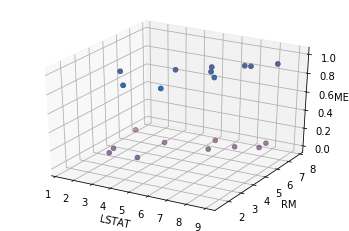

<Figure size 36000x28800 with 0 Axes>

In [12]:
newB= grad_desc(X, Y, B, alpha, 200000)
Ypred = [0] * n
for i in range (0,n):
    Ypred[i]=predict(newB,X_test[i])

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x1_test,x2_test,Y_test,color='r')
threedee.scatter(x1_test,x2_test,Ypred)
threedee.set_xlabel('LSTAT')
threedee.set_ylabel('RM')
threedee.set_zlabel('MEDV')
plt.figure(figsize=(500,400)) 
plt.show()

In [13]:

def rmse(Y_test, Y_pred):
    rmse = np.sqrt(sum((Y_test - Y_pred) ** 2) / len(Y))
    return rmse
print(rmse(Y_test,Ypred))
print(Y_test,Ypred)

0.0
[1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.] [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [17]:
xq=np.array([1,5.8097,2.4711])
print(predict(newB,xq))

1
